<a href="https://colab.research.google.com/github/leviethung2103/Projects/blob/master/Convolutions_Sidebar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's explore how convolutions work by creating a basic convolution on a 2D Grey Scale image. First we can load the image by taking the 'ascent' image from scipy. It's a nice, built-in picture with lots of angles and lines.

In [0]:
import cv2
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt

# Get an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos
i = misc.ascent()

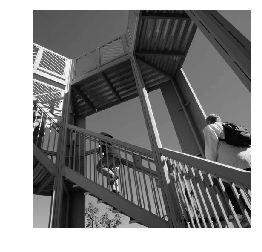

In [0]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [0]:
i_transformed = np.copy(i)
# Keep track the dimensions of the image
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

Now we can create a filter as a 3x3 array.

# Convolution

The trick of image filtering is that you have a 2D filter matrix, and the 2D image. Then, for every pixel of the image, take the sum of products. Each product is the color value of the current pixel or a neighbor of it, with the corresponding value of the filter matrix. The center of the filter matrix has to be multiplied with the current pixel, the other elements of the filter matrix with corresponding neighbor pixels.


In [0]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [0]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + (i[x-1,y-1]*filter[0][0])
    convolution = convolution + (i[x,y-1]*filter[0][1])
    convolution = convolution + (i[x+1,y-1]*filter[0][2])
    convolution = convolution + (i[x-1,y]*filter[1][0])
    convolution = convolution + (i[x,y]*filter[1][1])
    convolution = convolution + (i[x+1,y]*filter[1][2])
    convolution = convolution + (i[x-1,y+1]*filter[2][0])
    convolution = convolution + (i[x,y+1]*filter[2][1])
    convolution = convolution + (i[x+1,y+1]*filter[2][2])
    convolution = convolution*weight
    if (convolution<0):
      convolution = 0
    if (convolution>255):
      convolution = 255
    i_transformed[x,y] = convolution
    

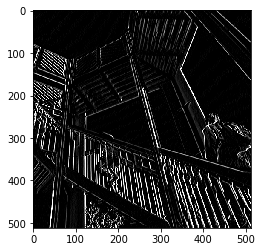

In [0]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)

# Pooling 

In [0]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x,new_y))
for x in range(0,size_x,2):
  for y in range(0,size_y,2):
    pixels = []
    pixels.append(i_transformed[x,y])
    pixels.append(i_transformed[x+1,y])
    pixels.append(i_transformed[x,y+1])
    pixels.append(i_transformed[x+1,y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)
    

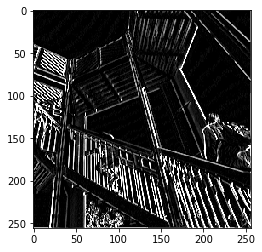

In [0]:
# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)

# Filters

A lot of filters can be figured out at this link:
https://lodev.org/cgtutor/filtering.html


## Gaussian

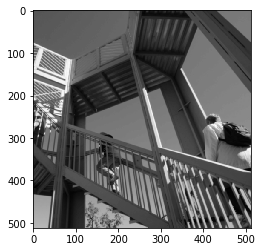

In [0]:
# Gaussian Blur
import cv2
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt


# Get an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos
i = misc.ascent()

# definethe gaussian filter. It's a 3x3 kernel 
filter = [ [1, 2, 1], [2, 4, 2], [1, 2, 1]]
weight = 1.0/16.0 # because sum of filter = 16

size_x = i.shape[0]
size_y = i.shape[1]
newImage = np.zeros((size_x,size_y))
 
# do convolution
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + i[x-1,y-1]*filter[0][0]
    convolution = convolution + i[x,y-1]*filter[0][1]
    convolution = convolution + i[x+1,y-1]*filter[0][2]
    convolution = convolution + i[x-1,y]*filter[1][0]
    convolution = convolution + i[x,y]*filter[1][1]
    convolution = convolution + i[x+1,y]*filter[1][2]
    convolution = convolution + i[x-1,y+1]*filter[2][0]
    convolution = convolution + i[x,y+1]*filter[2][1]
    convolution = convolution + i[x+1,y+1]*filter[2][2]
    convolution = convolution*weight 
    if convolution < 0: 
      convolution = 0
    if convolution > 255:
      convolution = 255
    newImage[x,y] = convolution
    
plt.gray()
plt.imshow(newImage)

## Sharpen

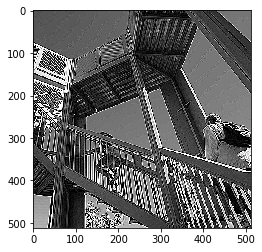

In [0]:
# Sharpen
import cv2
import numpy as np
from scipy import misc
from matplotlib import pyplot as plt


# Get an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos
i = misc.ascent()


# definethe gaussian filter. It's a 3x3 kernel 
filter = [ [-1,-1, -1], [-1, 9, -1], [-1, -1, -1]]
#filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
weight = 1.0 # because sum of filter = 1

size_x = i.shape[0]
size_y = i.shape[1]
newImage = np.zeros((size_x,size_y))
 
# do convolution
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
    convolution = 0.0
    convolution = convolution + i[x-1,y-1]*filter[0][0]
    convolution = convolution + i[x,y-1]*filter[0][1]
    convolution = convolution + i[x+1,y-1]*filter[0][2]
    convolution = convolution + i[x-1,y]*filter[1][0]
    convolution = convolution + i[x,y]*filter[1][1]
    convolution = convolution + i[x+1,y]*filter[1][2]
    convolution = convolution + i[x-1,y+1]*filter[2][0]
    convolution = convolution + i[x,y+1]*filter[2][1]
    convolution = convolution + i[x+1,y+1]*filter[2][2]
    convolution = convolution*weight 
    if convolution < 0: 
      convolution = 0
    if convolution > 255:
      convolution = 255
    newImage[x,y] = convolution
    

plt.gray()
plt.imshow(newImage)